# Load Mining Masks

Author: duckworthd@

Example code showing one how to load masks created by [`download_mining_masks_main.py`](https://github.com/datakind/ON-MiningDetection/blob/master/duckworthd/download_mining_masks_main.py).

## Creating New Masks

1. Download IPIS's [Last Visit Dataset](http://ipisresearch.be/home/conflict-mapping/maps/open-data/) as a shapefile. Rename its contents to `mining_locations.shp`.
1. Create mining site masks with QGIS. For each mask, add a matching `pcode` attribute (e.g. `codmine01234`) to link it to one of IPIS's existing mines. Store it as `mining_masks.shp`. An example shapefile can be found [here](http://52.33.163.84:8888/files/data_s3/2019-09-23%20IPIS%20Mining%20Site%20Masks.zip).
1. Run the following shell command to save the masks to disk. Sina's masks from `mines_ipis250` will be included.
1. Follow the notebook to load these masks into Python.

```shell
$ python duckworthd/download_mining_masks_main.py \
    --mining_site_masks_shapefile="mining_masks.shp" \
    --mining_site_locations_shapefile="mining_locations.shp" \
    --use_mines_ipis250 \
    --output_image_root="/tmp/masks"
```

## Adding New Masks

By default, running `download_mining_masks_main.py` will not overwrite existing masks. If you have added new masks, simply run the same command again to rasterize the new ones alone.

## Redownloading Masks

If you would like to overwrite existing masks, add the `--force_download` flag,

```shell
$ python duckworthd/download_mining_masks_main.py \
    ... \
    --force_download
```

In [1]:
# Set root directory to nearest parent folder for this file
import os
import sys

def git_root(current_dir=None):
    """Find root directory for a github repo above 'current_dir'.
    
    Args:
        current_dir: str. Path to directory within a git repo. 
            If None, defaults to the current working directory.
            
    Returns:
        Path to parent directory containing '.git'.
        
    Raises:
        ValueError: If no parent directory contains '.git'.
    """
    result = current_dir or os.getcwd()
    while True:
        if '.git' in os.listdir(result):
            return result
        if result == "/":
            raise ValueError("Could not find parent directory containing .git.")
        result = os.path.dirname(result)

def maybe_add_to_sys_path(path):
    """Add 'path' to 'sys.path' if it's not already there."""
    if path in sys.path:
        return
    sys.path.append(path)
    
maybe_add_to_sys_path(git_root())

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from duckworthd import mining

%matplotlib inline

In [27]:
# Root directory containing mining site masks.

MINING_SITE_MASKS_ROOT = "/home/daniel/Desktop/datakind/data/mines_ipis_20171012/"

In [29]:
# Load metadata. Drop all rows that don't relate to masks.

masks_metadata = mining.load_metadata(MINING_SITE_MASKS_ROOT)
masks_metadata = masks_metadata[masks_metadata["fpath"].str.endswith("mining_masks")]
masks_metadata.head()

,bands,collection,dates,dim,fpath,id
0,[mask],mining_masks,[20171001],"[100, 100, 1, 1]",1677/mining_masks,1677.0
1,[mask],mining_masks,[20171001],"[100, 100, 1, 1]",861/mining_masks,861.0
10,[mask],mining_masks,[20171001],"[100, 100, 1, 1]",873/mining_masks,873.0
100,[mask],mining_masks,[20171001],"[100, 100, 1, 1]",2009/mining_masks,2009.0
101,[mask],mining_masks,[20171001],"[100, 100, 1, 1]",1358/mining_masks,1358.0


In [30]:
# Load mining site masks.

imgs = [
    mining.load_image(img_metadata, image_root=MINING_SITE_MASKS_ROOT) 
    for _, img_metadata in masks_metadata.iterrows()]
imgs = np.stack(imgs)
imgs.shape

(289, 100, 100, 1, 1)

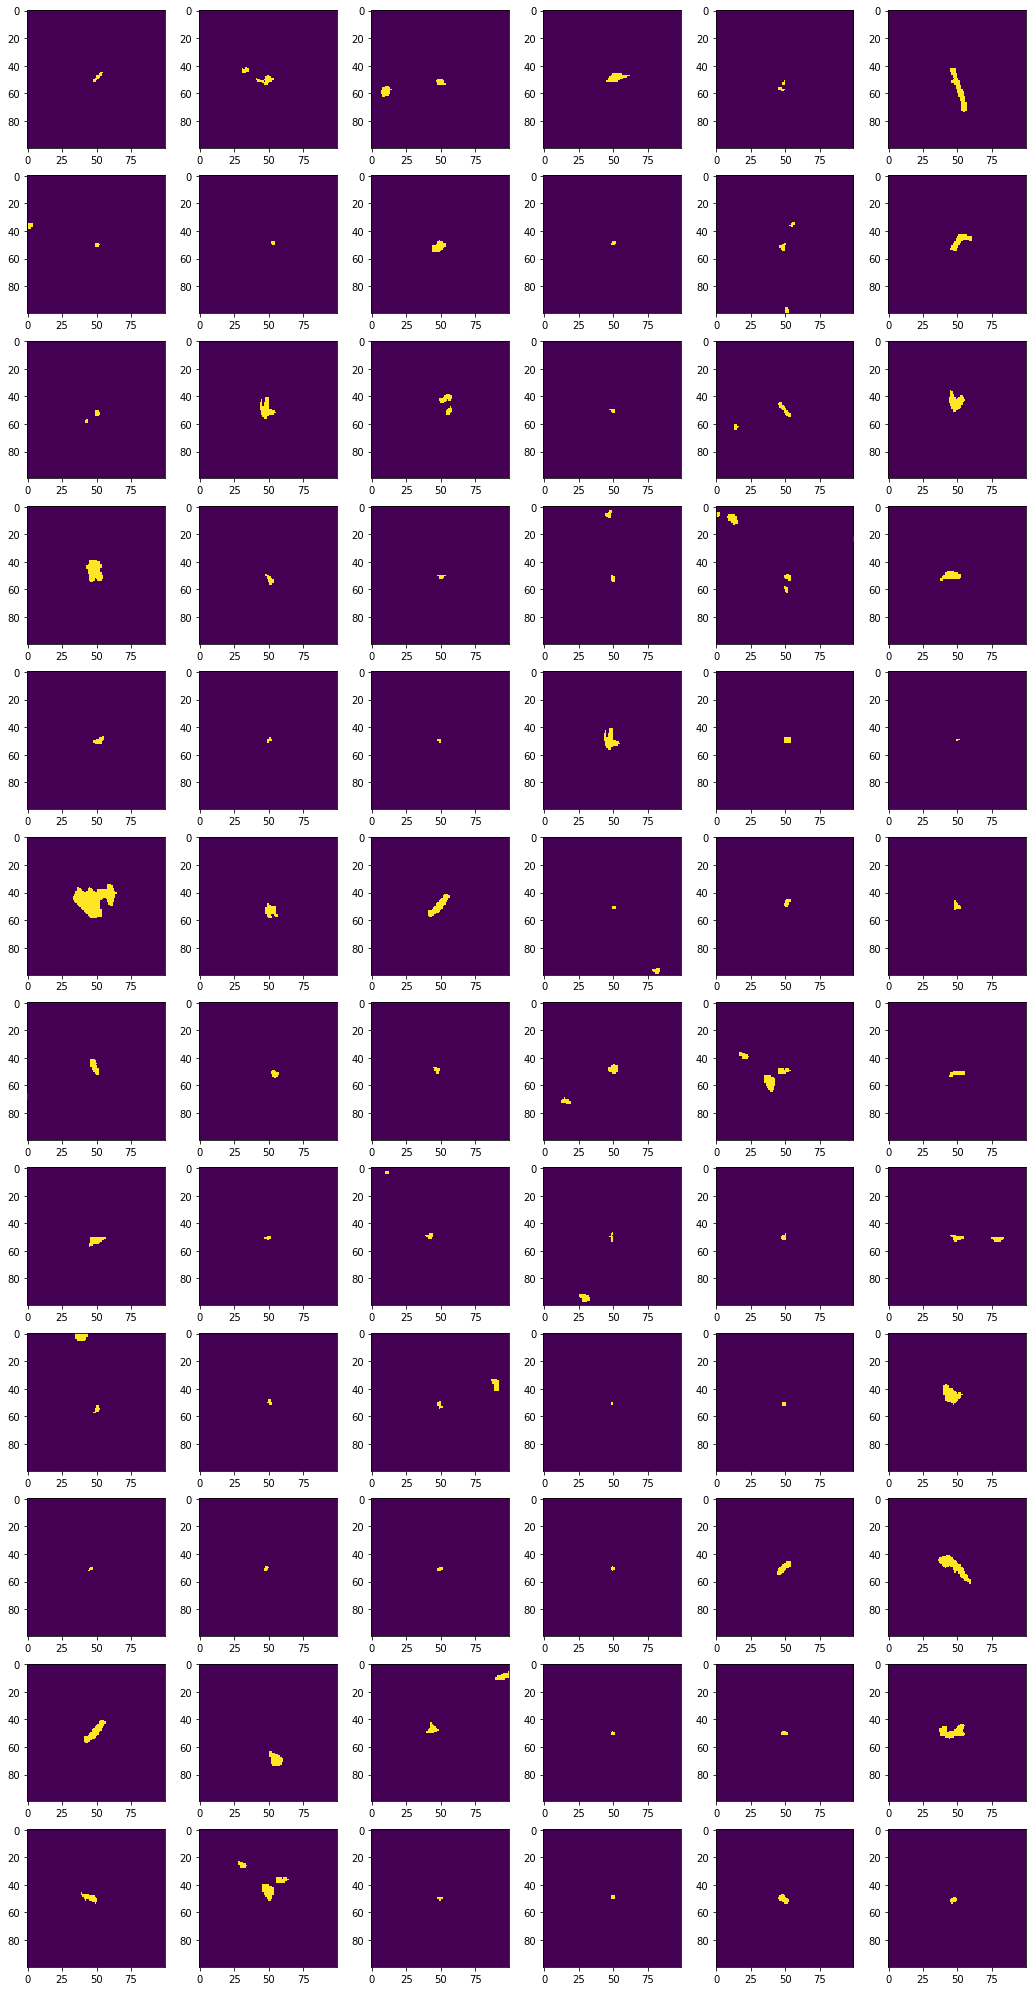

In [31]:
# Visualize mining site masks.

MAX_NUM_ROWS = 12

def divup(a, b):
    return int(np.ceil(a / b))

def plot_masks(imgs):
    num_imgs = imgs.shape[0]
    num_cols = 6
    num_rows = min(MAX_NUM_ROWS, divup(num_imgs, num_cols))

    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols * 3,  num_rows * 3))

    for i, ax in enumerate(axs.flatten()):
        ax.imshow(imgs[i,:,:,0,0])
        
plot_masks(imgs)